# Import the necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

: 

# Loading Dataset

In [7]:
data = pd.read_csv('CSV_Files/SWAGAT_INPUT_income_dataset_balanced.csv')
# data = pd.read_csv('CSV_Files/InputData.csv')
# data = pd.read_csv('CSV_Files/BalancedInputData.csv')

In [8]:
data.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,7,10,1
1,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,10,11,1
2,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,6,11,1
3,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,1,10,1
4,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,7,11,1
5,373,780090,55,9,single,norent_noown,no,Surveyor,Gorakhpur,Uttar_Pradesh,9,14,1
6,396,321358,78,17,single,rented,no,Dentist,Alwar,Rajasthan,9,13,1
7,412,527900,61,9,single,rented,yes,Economist,Meerut,Uttar_Pradesh,9,10,1
8,455,649902,54,15,single,rented,no,Technician,Aurangabad,Maharashtra,8,11,1
9,470,549476,47,1,single,rented,no,Fashion_Designer,Dhule,Maharashtra,1,10,1


In [9]:
# data is clean
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

# Exploratory Data Analysis (EDA)

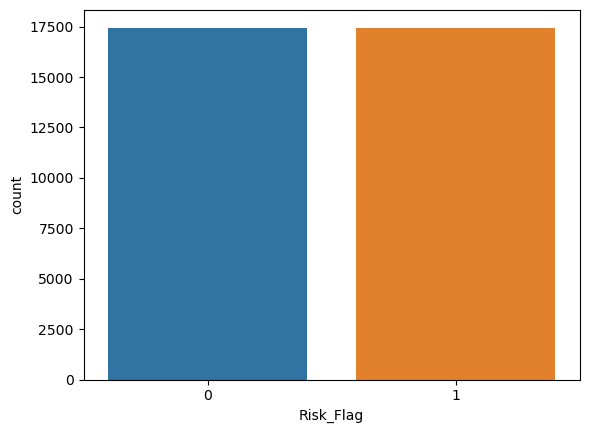

In [10]:
# Distribution of the target variable (Risk_flag)
sns.countplot(x='Risk_Flag', data=data)
plt.show()

C:\Users\gauta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


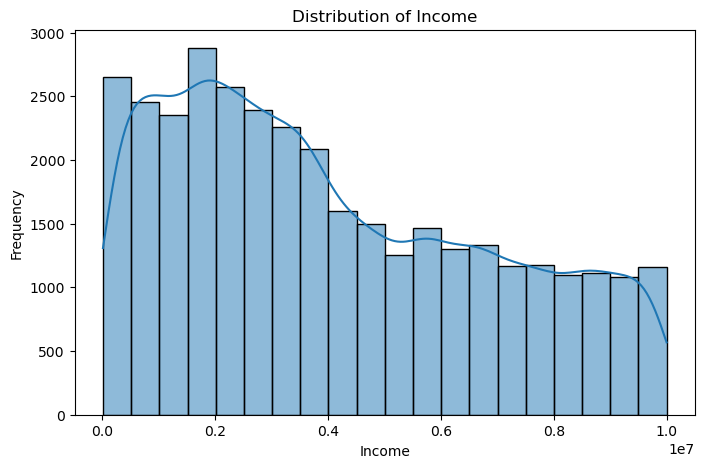

C:\Users\gauta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


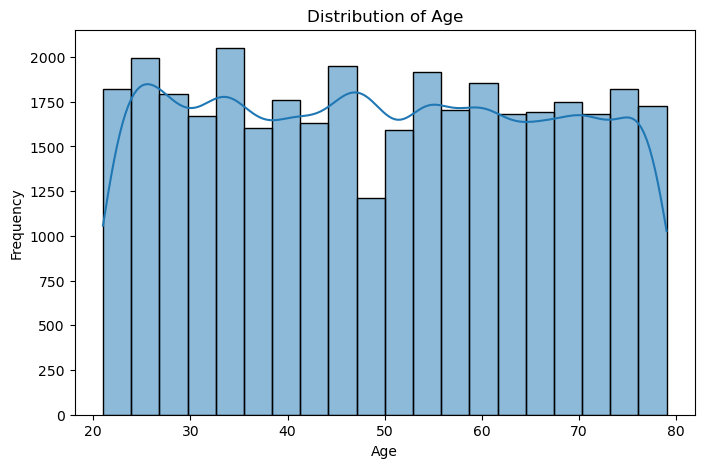

C:\Users\gauta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


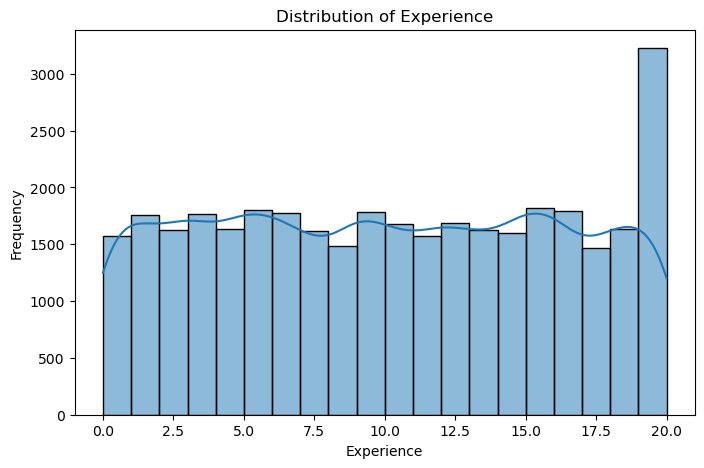

C:\Users\gauta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


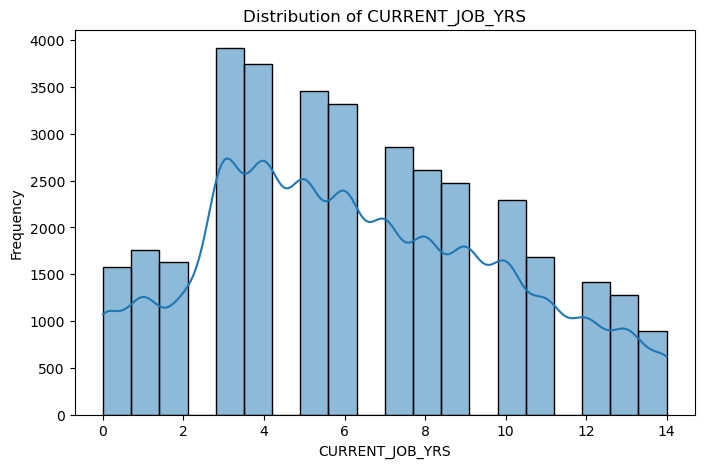

C:\Users\gauta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


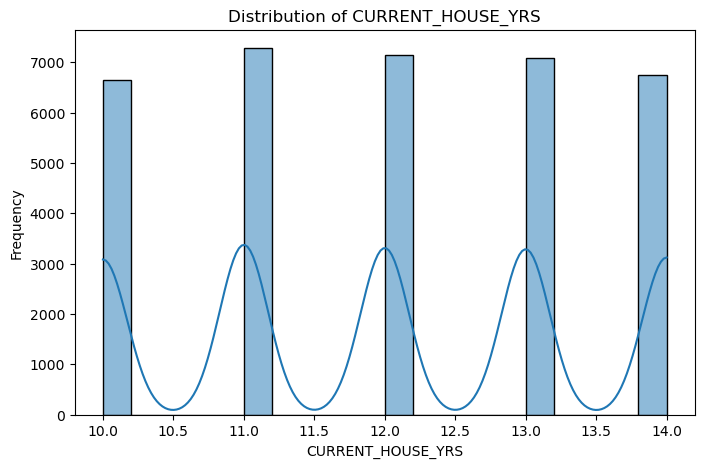

In [11]:
# Univariate Analysis
# Distribution of numerical features
numerical_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

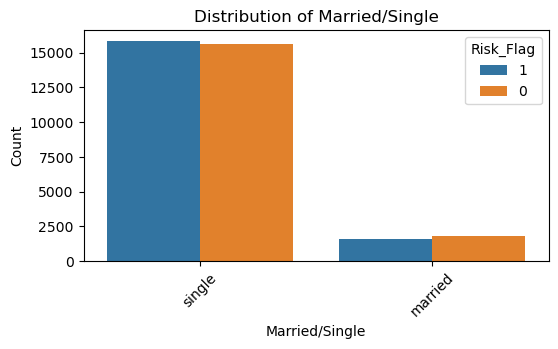

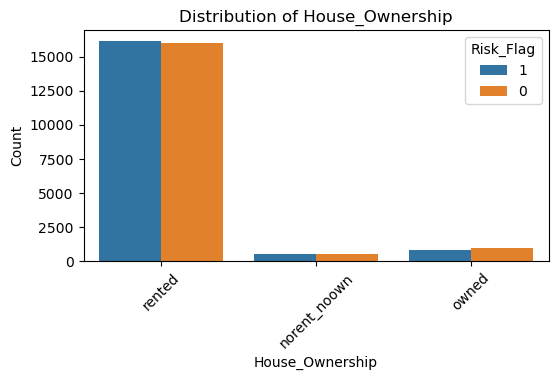

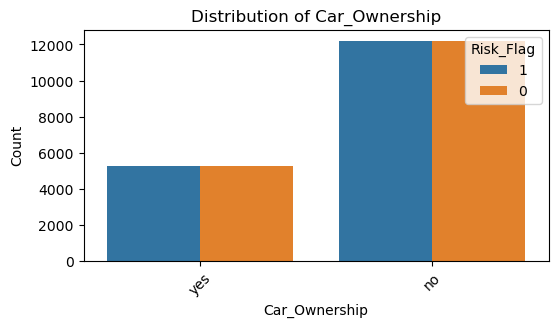

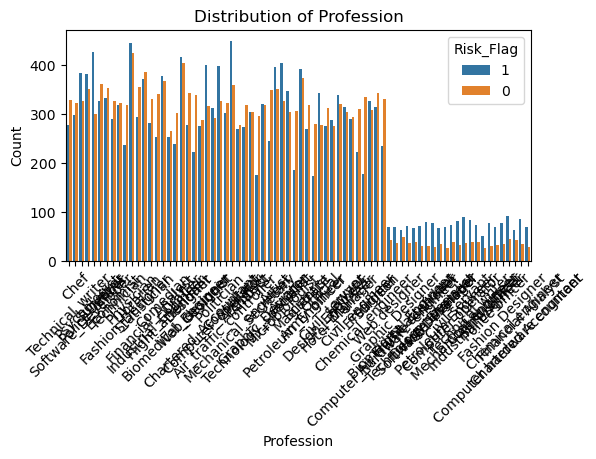

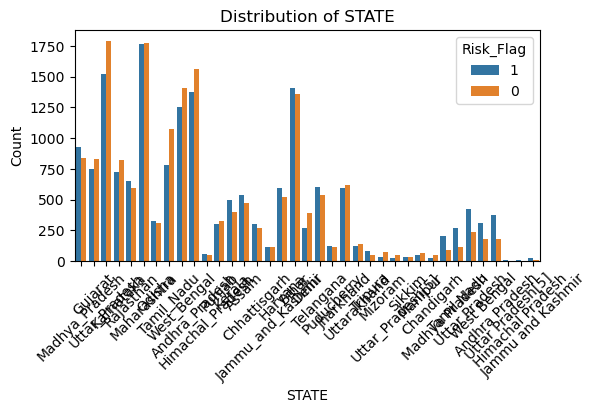

In [15]:
# Convert 'Risk_Flag' to string
data['Risk_Flag'] = data['Risk_Flag'].astype(str)

# Distribution of categorical features
categorical_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'STATE']
for feature in categorical_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=feature, data=data, hue='Risk_Flag')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Risk_Flag', loc='upper right')
    plt.show()

In [16]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,34904.000000,3.490400e+04,34904.000000,34904.000000,34904.000000,34904.000000
mean,161300.287847,4.068210e+06,49.656916,9.930552,6.295066,11.999456
std,82905.497186,2.806348e+06,17.112627,6.030478,3.639738,1.395050
min,28.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,87181.250000,1.721354e+06,35.000000,5.000000,3.000000,11.000000
50%,174686.000000,3.475913e+06,49.000000,10.000000,6.000000,12.000000
75%,237406.250000,6.284015e+06,64.000000,15.000000,9.000000,13.000000
max,279997.000000,9.999180e+06,79.000000,20.000000,14.000000,14.000000


In [ ]:
# Select subset of features (e.g., first 20 columns)
subset_features = data.iloc[:, :8]

# Calculate correlation matrix for subset of features
corr_subset = subset_features.corr(method="pearson")

# Increase figure size
# plt.figure(figsize=(12, 10))

# Define colormap
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)

# Create heatmap for subset of features
sns.heatmap(corr_subset, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2, annot=True, annot_kws={"size": 8})

# Show plot
plt.show()

# Data Encoding

In [17]:
input_data = data.copy()

In [18]:
input_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,7,10,1
1,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,10,11,1
2,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,6,11,1
3,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,1,10,1
4,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,7,11,1


## Discretization of Income

In [19]:
# Define the bins for income
bins = [0, 2000000, 4000000, 6000000, 8000000, np.inf]
labels = ['Low', 'Low-Medium', 'Medium', 'High-Medium', 'High']

# Create a new column for the binned income
input_data['Income_Bin'] = pd.cut(data['Income'], bins=bins, labels=labels)

input_data.head(10) 

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Bin
0,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,7,10,1,Low
1,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,10,11,1,Low
2,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,6,11,1,Low
3,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,1,10,1,Low
4,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,7,11,1,Low
5,373,780090,55,9,single,norent_noown,no,Surveyor,Gorakhpur,Uttar_Pradesh,9,14,1,Low
6,396,321358,78,17,single,rented,no,Dentist,Alwar,Rajasthan,9,13,1,Low
7,412,527900,61,9,single,rented,yes,Economist,Meerut,Uttar_Pradesh,9,10,1,Low
8,455,649902,54,15,single,rented,no,Technician,Aurangabad,Maharashtra,8,11,1,Low
9,470,549476,47,1,single,rented,no,Fashion_Designer,Dhule,Maharashtra,1,10,1,Low


C:\Users\gauta\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


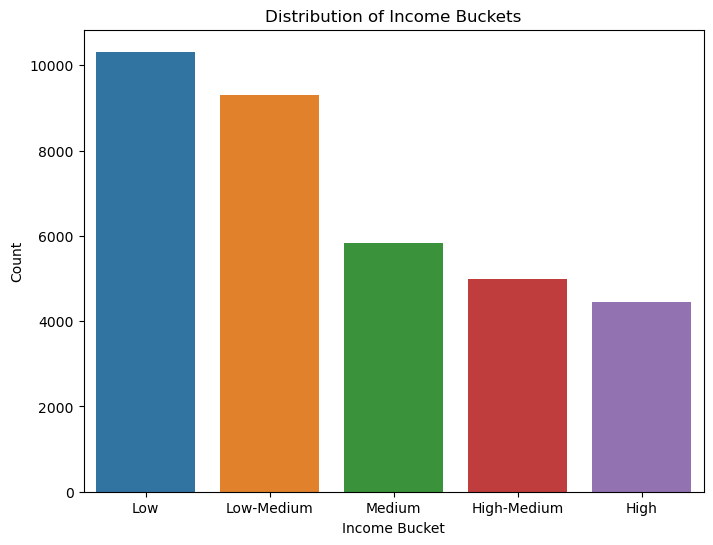

In [20]:
# EDA for Income Buckets
# Create a count plot for the Income_Bin
plt.figure(figsize=(8, 6))
sns.countplot(x='Income_Bin', data=input_data, order=labels)
plt.title('Distribution of Income Buckets')
plt.xlabel('Income Bucket')
plt.ylabel('Count')
plt.show()

## Encoding for married/single

In [21]:
# Mapping for encoding Married/Single column
marital_status_map = {'single': 0, 'married': 1}

# Apply the mapping to create a new column
input_data['Married_Single_Encoded'] = input_data['Married/Single'].map(marital_status_map)

# Display the updated DataFrame
input_data.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Bin,Married_Single_Encoded
0,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,7,10,1,Low,0
1,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,10,11,1,Low,0
2,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,6,11,1,Low,0
3,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,1,10,1,Low,0
4,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,7,11,1,Low,0
5,373,780090,55,9,single,norent_noown,no,Surveyor,Gorakhpur,Uttar_Pradesh,9,14,1,Low,0
6,396,321358,78,17,single,rented,no,Dentist,Alwar,Rajasthan,9,13,1,Low,0
7,412,527900,61,9,single,rented,yes,Economist,Meerut,Uttar_Pradesh,9,10,1,Low,0
8,455,649902,54,15,single,rented,no,Technician,Aurangabad,Maharashtra,8,11,1,Low,0
9,470,549476,47,1,single,rented,no,Fashion_Designer,Dhule,Maharashtra,1,10,1,Low,0


In [23]:
# Checking if encoding is done properly
print(input_data['Married/Single'].value_counts())
print(input_data['Married_Single_Encoded'].value_counts())

Married/Single
single     31465
married     3439
Name: count, dtype: int64
Married_Single_Encoded
0    31465
1     3439
Name: count, dtype: int64


## Encoding for House_Ownership

In [25]:
# Mapping for encoding House_Ownership column
house_ownership_map = {'rented': 0, 'owned': 1, 'norent_noown': 2}

# Apply the mapping to create a new column
input_data['House_Ownership_Encoded'] = input_data['House_Ownership'].map(house_ownership_map)

# Display the updated DataFrame
input_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded
0,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,7,10,1,Low,0,0
1,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,10,11,1,Low,0,0
2,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,6,11,1,Low,0,0
3,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,1,10,1,Low,0,0
4,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,7,11,1,Low,0,0


In [27]:
# Checking if encoding is done properly
print(input_data['House_Ownership'].value_counts())
print(input_data['House_Ownership_Encoded'].value_counts())

House_Ownership
rented          32168
owned            1749
norent_noown      987
Name: count, dtype: int64
House_Ownership_Encoded
0    32168
1     1749
2      987
Name: count, dtype: int64


## Encoding for Car_Ownership

In [28]:
# Mapping for encoding Car_Ownership column
car_ownership_map = {'no': 0, 'yes': 1}

# Apply the mapping to create a new column
input_data['Car_Ownership_Encoded'] = input_data['Car_Ownership'].map(car_ownership_map)

# Display the updated DataFrame
input_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded
0,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,7,10,1,Low,0,0,1
1,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,10,11,1,Low,0,0,1
2,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,6,11,1,Low,0,0,0
3,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,1,10,1,Low,0,0,0
4,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,7,11,1,Low,0,0,1


In [30]:
# Checking if encoding is done properly
print(input_data['Car_Ownership'].value_counts())
print(input_data['Car_Ownership_Encoded'].value_counts())

Car_Ownership
no     24372
yes    10532
Name: count, dtype: int64
Car_Ownership_Encoded
0    24372
1    10532
Name: count, dtype: int64


## Encoding for Profession

In [31]:
# Apply one-hot encoding to the 'Profession' column
profession_encoded = pd.get_dummies(input_data['Profession'], prefix='Profession')

# Concatenate the encoded columns to the original dataframe
input_data = pd.concat([input_data, profession_encoded], axis=1)

# Display the updated DataFrame
input_data.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer
0,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,...,False,False,False,False,True,False,False,False,False,False
1,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,...,False,False,False,False,False,False,False,False,False,False
2,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,...,False,False,False,False,False,False,False,False,False,False
3,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,...,False,False,False,False,False,False,False,False,False,False
4,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,...,False,False,False,False,False,False,False,False,False,False
5,373,780090,55,9,single,norent_noown,no,Surveyor,Gorakhpur,Uttar_Pradesh,...,False,False,True,False,False,False,False,False,False,False
6,396,321358,78,17,single,rented,no,Dentist,Alwar,Rajasthan,...,False,False,False,False,False,False,False,False,False,False
7,412,527900,61,9,single,rented,yes,Economist,Meerut,Uttar_Pradesh,...,False,False,False,False,False,False,False,False,False,False
8,455,649902,54,15,single,rented,no,Technician,Aurangabad,Maharashtra,...,False,False,False,False,False,True,False,False,False,False
9,470,549476,47,1,single,rented,no,Fashion_Designer,Dhule,Maharashtra,...,False,False,False,False,False,False,False,False,False,False


In [32]:
print(input_data['Profession'].value_counts())

Profession
Physician                871
Drafter                  823
Consultant               809
Magistrate               767
Statistician             760
                        ... 
Hotel Manager            102
Technology specialist    102
Chartered Accountant      98
Petroleum Engineer        97
Civil engineer            79
Name: count, Length: 74, dtype: int64


## Encoding for City

In [33]:
print(input_data['CITY'].value_counts())

CITY
Suryapet                 194
Vijayanagaram            193
Satna                    192
Kottayam                 189
Sikar                    184
                        ... 
Rajpur Sonarpur           17
Sri Ganganagar            14
Bhalswa Jahangir Pur      12
Surendranagar Dudhrej     12
Sultan Pur Majra          10
Name: count, Length: 333, dtype: int64


In [34]:
# Calculate the frequency of each city
city_frequency = input_data['CITY'].value_counts(normalize=True)

# Map the city frequencies to the 'City' column
input_data['City_Frequency_Encoded'] = input_data['CITY'].map(city_frequency)

# Display the updated DataFrame
input_data.head(10)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,City_Frequency_Encoded
0,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,...,False,False,False,True,False,False,False,False,False,0.003094
1,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,...,False,False,False,False,False,False,False,False,False,0.003352
2,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,...,False,False,False,False,False,False,False,False,False,0.002693
3,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,...,False,False,False,False,False,False,False,False,False,0.003237
4,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,...,False,False,False,False,False,False,False,False,False,0.004928
5,373,780090,55,9,single,norent_noown,no,Surveyor,Gorakhpur,Uttar_Pradesh,...,False,True,False,False,False,False,False,False,False,0.004527
6,396,321358,78,17,single,rented,no,Dentist,Alwar,Rajasthan,...,False,False,False,False,False,False,False,False,False,0.004584
7,412,527900,61,9,single,rented,yes,Economist,Meerut,Uttar_Pradesh,...,False,False,False,False,False,False,False,False,False,0.002779
8,455,649902,54,15,single,rented,no,Technician,Aurangabad,Maharashtra,...,False,False,False,False,True,False,False,False,False,0.002722
9,470,549476,47,1,single,rented,no,Fashion_Designer,Dhule,Maharashtra,...,False,False,False,False,False,False,False,False,False,0.003438


## Encoding for STATE

In [35]:
# Checking for repeated values
print(input_data['STATE'].value_counts())

STATE
Maharashtra          3540
Uttar_Pradesh        3305
Andhra_Pradesh       2933
Bihar                2764
West_Bengal          2666
Tamil_Nadu           1857
Madhya_Pradesh       1763
Gujarat              1575
Karnataka            1544
Rajasthan            1250
Jharkhand            1209
Telangana            1139
Haryana              1115
Assam                1010
Kerala                897
Uttar Pradesh         663
Delhi                 662
Odisha                639
Punjab                627
Chhattisgarh          570
Andhra Pradesh        553
West Bengal           487
Tamil Nadu            380
Madhya Pradesh        293
Uttarakhand           263
Puducherry            232
Jammu_and_Kashmir     223
Tripura               131
Manipur               120
Himachal_Pradesh      108
Mizoram               106
Chandigarh             79
Uttar_Pradesh[5]       73
Sikkim                 67
Jammu and Kashmir      35
Himachal Pradesh       14
Uttar Pradesh[5]       12
Name: count, dtype: int64


### Removing Duplicates

In [40]:
input_data['STATE'] = input_data['STATE'].replace('Uttar Pradesh', 'Uttar_Pradesh')
input_data['STATE'] = input_data['STATE'].replace('Uttar Pradesh[5]', 'Uttar_Pradesh')
input_data['STATE'] = input_data['STATE'].replace('Himachal Pradesh', 'Himachal_Pradesh')
input_data['STATE'] = input_data['STATE'].replace('Jammu and Kashmir', 'Jammu_and_Kashmir')
input_data['STATE'] = input_data['STATE'].replace('Madhya Pradesh', 'Madhya_Pradesh')
input_data['STATE'] = input_data['STATE'].replace('Tamil Nadu', 'Tamil_Nadu')
input_data['STATE'] = input_data['STATE'].replace('West Bengal', 'West_Bengal')
input_data['STATE'] = input_data['STATE'].replace('Andhra Pradesh', 'Andhra_Pradesh')

In [41]:
# Checking for repeated values
print(input_data['STATE'].value_counts())

STATE
Uttar_Pradesh        4053
Maharashtra          3540
Andhra_Pradesh       3486
West_Bengal          3153
Bihar                2764
Tamil_Nadu           2237
Madhya_Pradesh       2056
Gujarat              1575
Karnataka            1544
Rajasthan            1250
Jharkhand            1209
Telangana            1139
Haryana              1115
Assam                1010
Kerala                897
Delhi                 662
Odisha                639
Punjab                627
Chhattisgarh          570
Uttarakhand           263
Jammu_and_Kashmir     258
Puducherry            232
Tripura               131
Himachal_Pradesh      122
Manipur               120
Mizoram               106
Chandigarh             79
Sikkim                 67
Name: count, dtype: int64


In [42]:
# Apply one-hot encoding to the 'STATE' column
state_encoded = pd.get_dummies(input_data['STATE'], prefix='STATE')

# Concatenate the encoded columns to the original dataframe
input_data = pd.concat([input_data, state_encoded], axis=1)

# Drop the original 'STATE' column
# input_data.drop('STATE', axis=1, inplace=True)

# Display the updated DataFrame
input_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,92,137594,52,10,single,rented,yes,Technical_writer,Sagar,Madhya_Pradesh,...,False,False,False,False,False,False,False,False,False,False
1,129,46750,33,13,single,rented,yes,Chef,Morbi,Gujarat,...,False,False,False,False,False,False,False,False,False,False
2,170,624985,47,11,single,rented,no,Software_Developer,Varanasi,Uttar_Pradesh,...,False,False,False,False,False,False,False,True,False,False
3,173,233888,64,1,single,rented,no,Psychologist,Tumkur,Karnataka,...,False,False,False,False,False,False,False,False,False,False
4,192,979926,61,14,single,rented,yes,Police_officer,Indore,Madhya_Pradesh,...,False,False,False,False,False,False,False,False,False,False


# Final Cleaning of DATA

In [43]:
final_data = input_data.copy()
print(final_data)
output_data = data.filter(['Id','Risk_Flag'])
print(output_data)

           Id   Income  Age  Experience Married/Single House_Ownership  \
0          92   137594   52          10         single          rented   
1         129    46750   33          13         single          rented   
2         170   624985   47          11         single          rented   
3         173   233888   64           1         single          rented   
4         192   979926   61          14         single          rented   
...       ...      ...  ...         ...            ...             ...   
34899  279810  9768762   66           1         single          rented   
34900  279821  9569607   51          13         single          rented   
34901  279851  9155705   35          12         single          rented   
34902  279933  9738992   35          17         single          rented   
34903  279974  9122548   58          12         single          rented   

      Car_Ownership          Profession         CITY           STATE  ...  \
0               yes    Technical_w

In [44]:
# Print all column names
print(final_data.columns)

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       ...
       'STATE_Puducherry', 'STATE_Punjab', 'STATE_Rajasthan', 'STATE_Sikkim',
       'STATE_Tamil_Nadu', 'STATE_Telangana', 'STATE_Tripura',
       'STATE_Uttar_Pradesh', 'STATE_Uttarakhand', 'STATE_West_Bengal'],
      dtype='object', length=120)


## Dropping Unnecessary Columns

In [46]:
# List of column names to drop
columns_to_drop = ['Id', 'Income', 'Married/Single','CITY', 'STATE', 'House_Ownership','Car_Ownership','Profession','Risk_Flag']

# Drop the columns
final_data.drop(columns=columns_to_drop, inplace=True)

# Display the updated DataFrame
final_data.head()

,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,...,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,52,10,7,10,Low,0,0,1,False,False,...,False,False,False,False,False,False,False,False,False,False
1,33,13,10,11,Low,0,0,1,False,False,...,False,False,False,False,False,False,False,False,False,False
2,47,11,6,11,Low,0,0,0,False,False,...,False,False,False,False,False,False,False,True,False,False
3,64,1,1,10,Low,0,0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,61,14,7,11,Low,0,0,1,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Print the DataFrame
final_data.head()

,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,City_Frequency_Encoded,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,52,10,7,10,Low,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.003094,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,33,13,10,11,Low,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.003352,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,47,11,6,11,Low,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

## Encoding Income Bins

In [48]:
# Define the mapping for encoding Income_Bin
income_bin_mapping = {'Low': 0, 'Low-Medium': 1, 'Medium': 2, 'High-Medium': 3, 'High': 4}

# Replace the values in the 'Income_Bin' column with the encoded values
final_data['Income_Bin'] = final_data['Income_Bin'].map(income_bin_mapping)

# Display the updated DataFrame
final_data.head()

,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,City_Frequency_Encoded,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,52,10,7,10,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.003094,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,33,13,10,11,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.003352,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,47,11,6,11,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [49]:
# Drop column
final_data.drop('City_Frequency_Encoded', axis=1, inplace=True)

# Display the updated DataFrame
final_data.head()

,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,52,10,7,10,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,33,13,10,11,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,47,11,6,11,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

## Storing Encoded Data in a new CSV file

In [51]:
output_test_data = data.filter(['Id','Risk_Flag'])
output_test_data.head()

,Id,Risk_Flag
0,92,1
1,129,1
2,170,1
3,173,1
4,192,1


In [52]:
train_X = final_data.copy()
train_X.head()

,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,52,10,7,10,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,33,13,10,11,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,47,11,6,11,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [53]:
column_dtype = train_X['Profession_Air_traffic_controller'].dtype
print(f"The data type of 'column_name' is: {column_dtype}")

The data type of 'column_name' is: bool


In [59]:
train_X.head(10)

,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,52,10,7,10,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,33,13,10,11,0,0,0,1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,47,11,6,11,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [60]:
# changing data type from boolean to int
for column in train_X.columns:
    if train_X[column].dtype == 'bool':
        train_X[column] = train_X[column].astype(int)
train_X.head(10)

,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,52,10,7,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,33,13,10,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,47,11,6,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,64,1,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,61,14,7,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,55,9,9,14,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,78,17,9,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [61]:
train_Y = output_test_data.copy()
train_Y.drop(['Id'],axis = 1 , inplace = True)
train_Y.head(10)

,Risk_Flag
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [62]:
train_X.shape

(34904, 110)

In [65]:
train_X.head()

,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal
0,52,10,7,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,33,13,10,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,47,11,6,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,64,1,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,61,14,7,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Checking dependancy of features

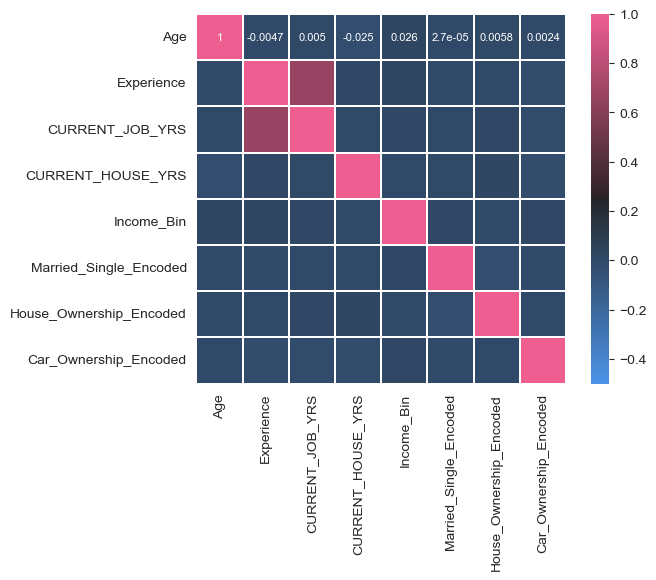

In [67]:
# Select subset of features (e.g., first 8 columns)
subset_features = train_X.iloc[:, :8]

# Calculate correlation matrix for subset of features
corr_subset = subset_features.corr(method="pearson")

# Increase figure size
# plt.figure(figsize=(12, 10))

# Define colormap
cmap = sns.diverging_palette(250, 354, 80, 60, center='dark', as_cmap=True)

# Create heatmap for subset of features
sns.heatmap(corr_subset, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2, annot=True, annot_kws={"size": 8})

# Show plot
plt.show()

In [68]:
# From the above graph, it is clear that Experience and CURRENT_JOB_YRS are dependent on each other 

## Convert continuous features to Categorical features

In [69]:
train_X["cat_age"] = pd.cut(train_X["Age"].values, bins = 6, labels = [0,1,2,3,4,5])
train_X["cat_exp"] = pd.cut(train_X["Experience"].values, bins = 5, labels = [0,1,2,3,4])
train_X["cat_CURRENT_JOB_YRS"] = pd.cut(train_X["CURRENT_JOB_YRS"].values, bins = 5, labels = [0,1,2,3,4])

train_X.head(10)

C:\Users\gauta\AppData\Local\Temp\ipykernel_17012\1368565108.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_X["cat_age"] = pd.cut(train_X["Age"].values, bins = 6, labels = [0,1,2,3,4,5])
C:\Users\gauta\AppData\Local\Temp\ipykernel_17012\1368565108.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_X["cat_exp"] = pd.cut(train_X["Experience"].values, bins = 5, labels = [0,1,2,3,4])
C:\Users\gauta\AppData\Local\Temp\ipykernel_17012\1368565108.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usual

,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal,cat_age,cat_exp,cat_CURRENT_JOB_YRS
0,52,10,7,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2
1,33,13,10,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3
2,47,11,6,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,2
3,64,1,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
4,61,14,7,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,2
5,55,9,9,14,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,2,3
6,78,17,9,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [70]:
train_X = train_X.drop(columns=["Age", "Experience", "CURRENT_JOB_YRS"])
train_X.head(10)

,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal,cat_age,cat_exp,cat_CURRENT_JOB_YRS
0,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2
1,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3
2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,2
3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
4,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,2
5,14,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,2,3
6,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [71]:
train_X.shape

(34904, 110)

In [72]:
train_X.columns.tolist()

['CURRENT_HOUSE_YRS',
 'Income_Bin',
 'Married_Single_Encoded',
 'House_Ownership_Encoded',
 'Car_Ownership_Encoded',
 'Profession_Air traffic controller',
 'Profession_Air_traffic_controller',
 'Profession_Analyst',
 'Profession_Architect',
 'Profession_Army officer',
 'Profession_Army_officer',
 'Profession_Artist',
 'Profession_Aviator',
 'Profession_Biomedical Engineer',
 'Profession_Biomedical_Engineer',
 'Profession_Chartered Accountant',
 'Profession_Chartered_Accountant',
 'Profession_Chef',
 'Profession_Chemical engineer',
 'Profession_Chemical_engineer',
 'Profession_Civil engineer',
 'Profession_Civil servant',
 'Profession_Civil_engineer',
 'Profession_Civil_servant',
 'Profession_Comedian',
 'Profession_Computer hardware engineer',
 'Profession_Computer operator',
 'Profession_Computer_hardware_engineer',
 'Profession_Computer_operator',
 'Profession_Consultant',
 'Profession_Dentist',
 'Profession_Design Engineer',
 'Profession_Design_Engineer',
 'Profession_Designer',
 '

In [73]:
# Assuming train_X and train_Y are your DataFrames
# Combine train_X and train_Y along columns axis
combined_df = pd.concat([train_X, train_Y], axis=1)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('CSV_Files/train_data.csv', index=False)

In [74]:
combined_df.head(10)

,CURRENT_HOUSE_YRS,Income_Bin,Married_Single_Encoded,House_Ownership_Encoded,Car_Ownership_Encoded,Profession_Air traffic controller,Profession_Air_traffic_controller,Profession_Analyst,Profession_Architect,Profession_Army officer,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical Engineer,Profession_Biomedical_Engineer,Profession_Chartered Accountant,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical engineer,Profession_Chemical_engineer,Profession_Civil engineer,Profession_Civil servant,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer hardware engineer,Profession_Computer operator,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design Engineer,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion Designer,Profession_Fashion_Designer,Profession_Financial Analyst,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight attendant,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic Designer,Profession_Graphic_Designer,Profession_Hotel Manager,Profession_Hotel_Manager,Profession_Industrial Engineer,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical engineer,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum Engineer,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police officer,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software Developer,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical writer,Profession_Technical_writer,Profession_Technician,Profession_Technology specialist,Profession_Technology_specialist,Profession_Web designer,Profession_Web_designer,STATE_Andhra_Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Delhi,STATE_Gujarat,STATE_Haryana,STATE_Himachal_Pradesh,STATE_Jammu_and_Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Madhya_Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Mizoram,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttarakhand,STATE_West_Bengal,cat_age,cat_exp,cat_CURRENT_JOB_YRS,Risk_Flag
0,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2,1
1,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,3,1
2,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,2,1
3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1
4,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,2,1
5,14,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,2,3,1
6,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,